In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [8]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', 'Data')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Step 1: spliting the data frame into two (loans accepted & loans not accepted). This step allows me to see the numbers of the 5000 from the dataset. I also made a scatter plot to show the features towards the accepted loan.

In [14]:
pl_acceptance_df = df.loc[df['Personal Loan'] == 1]

In [17]:
pl_acceptance_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


C:\Users\farcu\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


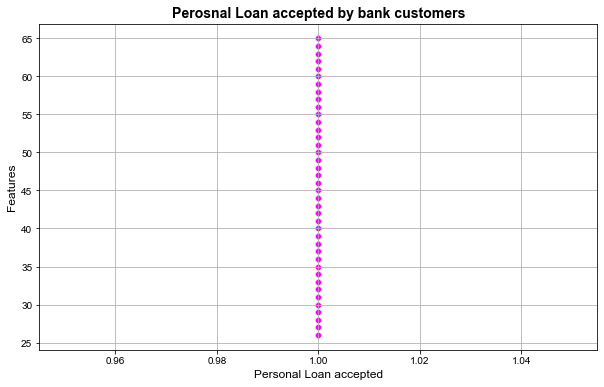

In [23]:
fig = plt.figure(figsize=[10,6])
ax = plt.subplot(111)
ax.set_title('Perosnal Loan accepted by bank customers', fontsize = 14, weight = 'bold')

x=pl_acceptance_df['Personal Loan']
y=pl_acceptance_df['Age']



sns.scatterplot(data=pl_acceptance_df, x=x, y=y, color = 'fuchsia')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='gray', linewidth=3.0)

plt.xlabel('Personal Loan accepted', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
sns.set_style('darkgrid')
ax.grid('on')

In [24]:
pl_not_acceptance_df = df.loc[df['Personal Loan'] == 0]

In [25]:
pl_not_acceptance_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Step 2: Here i used the describe() function to find the count, mean, std, min, max, 25%, 50%, 75% of the two data frames. This helped me compared and contrast the features between loan acceptance and rejected loans.

In [27]:
pl_not_acceptance_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.728982,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,1448.299331,11.450427,11.456672,40.578534,2156.949654,1.148771,1.567654,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1259.750000,35.000000,10.000000,35.000000,91911.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2518.500000,45.000000,20.000000,59.000000,93437.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,3768.250000,55.000000,30.000000,84.000000,94608.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [28]:
pl_acceptance_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905347,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097679,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.350000,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


# Step 3: used a bar chart to compared income, education, mortgage and Credit card averages betwen the two dataframes. These 4 features seemed to have the largest differences.

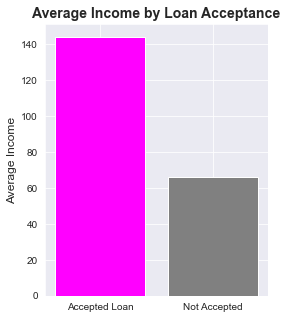

In [38]:
fig = plt.figure(figsize=[4,5])
plt.title('Average Income by Loan Acceptance', fontsize = 14, weight = 'bold')

x = [144, 66]
plt.bar(x = ('Accepted Loan', 'Not Accepted'), height = x, align='center', color=('fuchsia', 'gray',))

plt.ylabel('Average Income', fontsize = 12)
sns.set_style('darkgrid')
ax.grid('on')

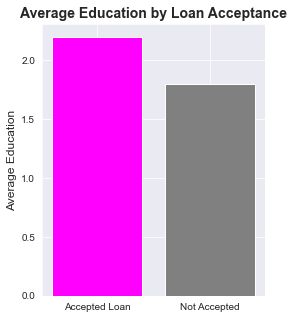

In [35]:
fig = plt.figure(figsize=[4,5])
plt.title('Average Education by Loan Acceptance', fontsize = 14, weight = 'bold')

x = [2.2, 1.8]
plt.bar(x = ('Accepted Loan', 'Not Accepted'), height = x, align='center', color=('fuchsia', 'gray',))

plt.ylabel('Average Education', fontsize = 12)
sns.set_style('darkgrid')
ax.grid('on')

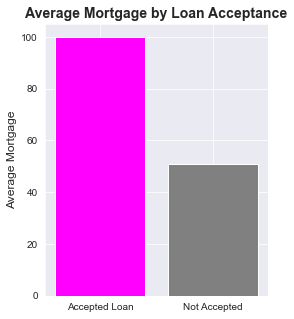

In [37]:
fig = plt.figure(figsize=[4,5])
plt.title('Average Mortgage by Loan Acceptance', fontsize = 14, weight = 'bold')

x = [100, 51]
plt.bar(x = ('Accepted Loan', 'Not Accepted'), height = x, align='center', color=('fuchsia', 'gray',))

plt.ylabel('Average Mortgage', fontsize = 12)
sns.set_style('darkgrid')
ax.grid('on')

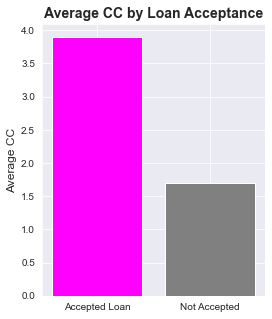

In [39]:
fig = plt.figure(figsize=[4,5])
plt.title('Average CC by Loan Acceptance', fontsize = 14, weight = 'bold')

x = [3.9, 1.7]
plt.bar(x = ('Accepted Loan', 'Not Accepted'), height = x, align='center', color=('fuchsia', 'gray',))

plt.ylabel('Average CC', fontsize = 12)
sns.set_style('darkgrid')
ax.grid('on')

# Step 4: i made y equal to persoanl loan and X equal to all features but dropped; personal loan, Zip Code and ID. then I ran a split test using 30% of the data.

In [41]:
y = df['Personal Loan']
X = df.drop(['Personal Loan', 'ZIP Code', 'ID'], axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# step 5: XGBClassifier method

In [65]:
ltv_xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, objective= 'binary:logistic', n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(ltv_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(ltv_xgb_model.score(X_test[X_train.columns], y_test)))

C:\Users\farcu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.99


# step 6: predictive model

In [66]:
y_pred = ltv_xgb_model.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.99      0.92      0.95       157

    accuracy                           0.99      1500
   macro avg       0.99      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500



# step 7: feature importance

In [68]:
importances = pd.DataFrame({
    'features': df.drop(['ZIP Code', 'ID', 'Personal Loan'], axis=1).columns,
    'importance': ltv_xgb_model.feature_importances_
})

importances = importances.sort_values(by='importance', ascending=False)

importances

,features,importance
5,Education,0.436118
2,Income,0.204156
3,Family,0.148735
8,CD Account,0.053739
4,CCAvg,0.046563
9,Online,0.024448
0,Age,0.020562
1,Experience,0.019408
6,Mortgage,0.018618
7,Securities Account,0.014504


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Education'),
  Text(1, 0, 'Income'),
  Text(2, 0, 'Family'),
  Text(3, 0, 'CD Account'),
  Text(4, 0, 'CCAvg'),
  Text(5, 0, 'Online'),
  Text(6, 0, 'Age'),
  Text(7, 0, 'Experience'),
  Text(8, 0, 'Mortgage'),
  Text(9, 0, 'Securities Account'),
  Text(10, 0, 'CreditCard')])

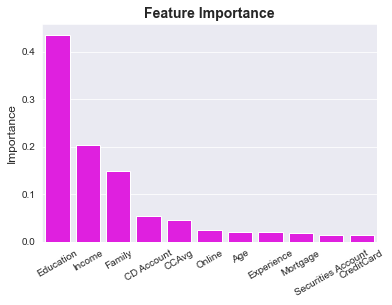

In [69]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)
ax.set_title('Feature Importance', fontsize = 14, weight = 'bold')

sns.barplot(x=importances['features'], y=importances['importance'], color='fuchsia')

group_labels = ['Education', 'Income',
             'Family', 'CD Account',
             'CCAvg', 'Online', 'Age', 'Experience', 'Mortgage', 'Securities Account', 'CreditCard']

ax.set_xticklabels(group_labels)
plt.ylabel('Importance', fontsize = 12)
ax.set_xlabel('')
plt.xticks(rotation=30)

# step 8: Kfold method

In [74]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(ltv_xgb_model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\farcu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\farcu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\farcu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\farcu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\farcu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\farcu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\farcu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\farcu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\farcu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\farcu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 98.72% (0.30%)
